In [1]:
import numpy as np
from matplotlib import pyplot as plt
import hcipy
print(f"hcipy version {hcipy.__version__}")
from hcipy.mode_basis import zernike_ansi

hcipy version 0.5.1


Not importing Lightbeam here so this is more portable/so we just look at the hcipy bit, but the Lightbeam-imposed constraint is: we want to couple light into a fiber of radius 10 microns on a grid that's 256 microns wide (plus a slight expansion for the PML method.)

In [2]:
ds = 0.25 # um
PML = int(4 / ds) # "perfectly matched layers": how much to expand the grid to damp evanescent waves
xyr = np.arange(-132.0, 132.0+ds, ds) # um
# -128 to +128 for physical purposes and +4 on both ends for the PML
xg, yg = np.meshgrid(xyr, xyr, indexing='ij')
rclad = 10.0 # um
wl = 1.55 # um

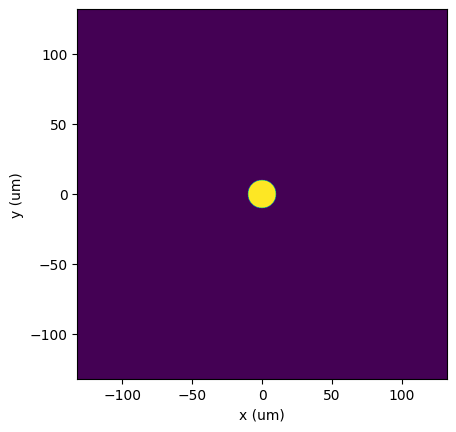

In [35]:
mask = xg ** 2 + yg ** 2 <= rclad ** 2
plt.imshow(mask, extent=(np.min(xg), np.max(xg), np.min(yg), np.max(yg)))
plt.xlabel("x (um)")
plt.ylabel("y (um)");

In [4]:
s = rclad / ds + 1/2

In [40]:
D = 3.0 # m; Shane
f = 51.0 # m; Shane
pupil_grid = hcipy.make_pupil_grid(dims=xg.shape, diameter=D)
focal_grid = hcipy.make_focal_grid(q = 11, num_airy = s / 11, spatial_resolution = (wl * 1e-6 * f / D))
fprop = hcipy.FraunhoferPropagator(pupil_grid, focal_grid, focal_length=f)

In [39]:
hcipy.make_focal_grid?

In [41]:
d = int((xg.shape[0] - 2 * s) // 2) # padding in the focal plane

In [42]:
phase = zernike_ansi(3)(pupil_grid)
aberration = np.exp(1j * phase)
wf = hcipy.Wavefront(aberration, wavelength=wl)
u = np.array(fprop(wf).electric_field.shaped)
u = np.pad(u, ((d, d), (d, d))) * mask

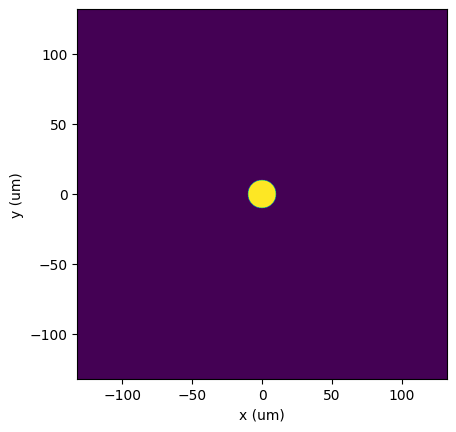

In [43]:
plt.imshow(np.abs(u), extent=(np.min(xg), np.max(xg), np.min(yg), np.max(yg)))
plt.xlabel("x (um)")
plt.ylabel("y (um)"); # this should be the same as the mask

Text(0.5, 1.0, 'Phase in the focal plane')

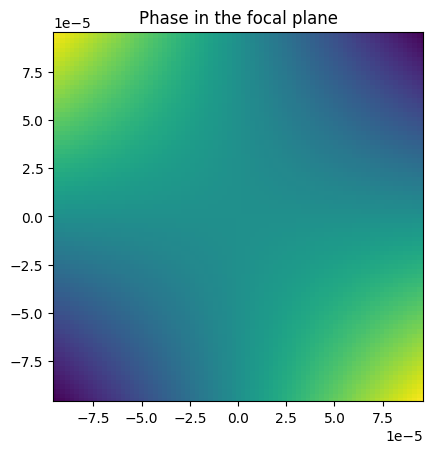

In [44]:
hcipy.imshow_field(np.angle(fprop(wf).electric_field)) # this is unpadded but it's in meters
plt.title("Phase in the focal plane")